---
## 2021-02-18
---



# 07-1 인공 신경망
- 인공 신경망, 텐서플로, 밀집층, 원-핫 인코딩
- 딥러닝과 인공 신경망 알고리즘을 이해하고 텐서플로를 사용해 간단한 인공 신경망 모델을 만들어 봄

## 패션 MNIST
- 텐서플로를 사용해 패션 MNIST 데이터를 불러옴

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


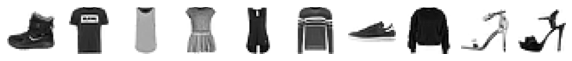

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


## 로지스틱 회귀로 패션 아이템 분류하기

- 확률적 경사 하강법
- 확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동
- 픽셀은 0~255 사이의 정수값을 가지므로 255로 나누에 0~1 사이의 값으로 정규

In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape)

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


- 티셔츠를 계산하기 위해 픽셀 784개와 곱하는 가중치 784개와 절편은 바지를 계산하기 위해 픽셀들에 곱하는 가중치, 절편과 **다르다**.


## 인공 신경망
- 뉴런 (유닛)
- 입력층: 픽셀값 자체이고 특별한 계산을 수행하지 않음
- 인공 뉴런은 생물학적 뉴런의 모양을 본뜬 수학 모델에 불과함
- 인공 신경망은 우리 뇌에 있는 뉴런과 같지 않다!


### 텐서플로와 케라스
- 텐서플로: 구글이 만든 딥러닝 라이브러리
- 케라스 : 텐서플로의 고수준 API
- 딥러닝 라이브러리가 머신러닝 라이브러리와 다른 점은 GPU를 사용하여 인공 신경망을 훈련함
- 케라스 라이브러리는 직접 GPU 연산을 수행하지 않음
- GPU 연산을 수행하는 다른 라이브러리를 백엔드로 사용 (텐서플로가 케라스의 백엔드 중 하나)


In [10]:
import tensorflow as tf
from tensorflow import keras

## 인공 신경망으로 모델 만들기
- 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용
- 이유?
1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
2. 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸림

In [11]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [12]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [13]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [14]:
# 완전 연결층

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [15]:
model = keras.Sequential(dense)

## 인공 신경망으로 패션 아이템 분류하기

In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

- 이진 분류에서는 출력층의 뉴런이 하나
- 이진 분류의 출력 뉴런은 오직 양성 클래스에 대한 확률만 출력하기 때문에 음성 클래스에 대한 확률은 1을 빼서 구할 수 있음
- 이진 분류의 타깃값은 양성 샘플은 1, 음성 샘플은 0으로 되어 있음
- 따라서 음성 샘플일 경우 1로 바꾸어 계산 --> 0은 뭘 곱해도 0이니까
- 각 클래스에 대해 확률이 나오기 때문에 쓸모없는 애들은 0을 곱해서 없애줌
- 원-핫 인코딩: 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것


In [17]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [18]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 488us/step - loss: 0.7665 - accuracy: 0.7395
Epoch 2/5
1500/1500 [==============================] - 1s 515us/step - loss: 0.4705 - accuracy: 0.8407
Epoch 3/5
1500/1500 [==============================] - 1s 469us/step - loss: 0.4638 - accuracy: 0.8449
Epoch 4/5
1500/1500 [==============================] - 1s 513us/step - loss: 0.4370 - accuracy: 0.8536
Epoch 5/5
1500/1500 [==============================] - 1s 533us/step - loss: 0.4243 - accuracy: 0.8571


In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 391us/step - loss: 0.4451 - accuracy: 0.8503


[0.44507884979248047, 0.8502500057220459]

## 인공 신경망 모델로 성능 향상
- 밀집층: 가장 간단한 인공 신경망의 층
---

# 07-2 심층 신경망
- 심층 신경망, 렐루 함수, 옵티마이저
- 인공 신경망에 층을 여러 개 추가하여 패션 MNIST 데이터셋을 분류하면서 케라스로 심층 신경망을 만드는 방법을 자세히 배움


## 2개의 층

In [20]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [21]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

- 은닉층: 입력층과 출력층 사이에 밀집층이 추가된 것
- 활성화 함수: 신경망 층의 선형 방정식의 계산 값에 적용하는 함수
- 이진분류: 시그모이드 함수, 다중분류: 소프트맥스 함수

In [22]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

- 적어도 출력층의 뉴런보다는 많게 만들어야 함

---
## 2021-02-19
---
## 심층 신경망 만들기

In [23]:
model = keras.Sequential([dense1, dense2])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러번에 걸쳐 경사 하강법 단계를 수 (미니배치 경사 하강법)
- 케라스의 기본 미니배치 크기는 32개



## 층을 추가하는 다른 방법


In [25]:
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
                         keras.layers.Dense(10, activation='softmax', name='output')], name='패션 MNIST 모델')

In [26]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [27]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 834us/step - loss: 0.7497 - accuracy: 0.7565
Epoch 2/5
1500/1500 [==============================] - 1s 748us/step - loss: 0.4098 - accuracy: 0.8514
Epoch 3/5
1500/1500 [==============================] - 1s 748us/step - loss: 0.3763 - accuracy: 0.8628
Epoch 4/5
1500/1500 [==============================] - 1s 727us/step - loss: 0.3480 - accuracy: 0.8744
Epoch 5/5
1500/1500 [==============================] - 1s 752us/step - loss: 0.3365 - accuracy: 0.8789


## 렐루 함수
- 입력이 양수일 경우 그대로 통과, 음수일 경우 0

In [30]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [33]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 742us/step - loss: 0.6740 - accuracy: 0.7688
Epoch 2/5
1500/1500 [==============================] - 1s 784us/step - loss: 0.3999 - accuracy: 0.8558
Epoch 3/5
1500/1500 [==============================] - 1s 786us/step - loss: 0.3594 - accuracy: 0.8699
Epoch 4/5
1500/1500 [==============================] - 1s 825us/step - loss: 0.3308 - accuracy: 0.8795
Epoch 5/5
1500/1500 [==============================] - 1s 723us/step - loss: 0.3222 - accuracy: 0.8842


In [34]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 431us/step - loss: 0.3683 - accuracy: 0.8776


[0.36833903193473816, 0.8775833249092102]

## 옵티마이저
- 추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야 할 하이퍼파라미터임
- 옵티마이저: 케라스가 제공하는 다양한 종류의 경사 하강법 알고리즘
- 가장 기본적인 옵티마이저인 확률적 경사 하강법 SGD

In [35]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [36]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [37]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [38]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

- 대부분의 경우 네스테로프 모멘텀 최적화가 기본 확률적 경사 하강법보다 더 나은 성능을 제공함
- 적응적 학습률: 모델이 최적점에 가까이 갈수록 학습률을 낮출 수 있음

In [39]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [40]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [41]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 640us/step - loss: 0.6895 - accuracy: 0.7631
Epoch 2/5
1500/1500 [==============================] - 1s 615us/step - loss: 0.4149 - accuracy: 0.8516
Epoch 3/5
1500/1500 [==============================] - 1s 634us/step - loss: 0.3629 - accuracy: 0.8682
Epoch 4/5
1500/1500 [==============================] - 1s 629us/step - loss: 0.3307 - accuracy: 0.8807
Epoch 5/5
1500/1500 [==============================] - 1s 628us/step - loss: 0.3065 - accuracy: 0.8904


In [43]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 458us/step - loss: 0.3422 - accuracy: 0.8766


[0.34215614199638367, 0.8765833377838135]

## 케라스 API를 활용한 심층 신경망
- 여러 개의 층을 추가하여 다층 인공 신경망을 만드는 방법을 터득함
- 모델 파라미터 개수를 계산하는 과정은 모델을 올바르게 이해하고 있는지 확인하는 좋은 방법
- 은닉층에 적용한 시그모이드 활성화 함수 대신 렐루 활성화 함수에 대해 배우고 적용
---
# 07-3 신경망 모델 훈련
- 드롭아웃, 콜백, 조기 종료
- 인공 신경망 모델을 훈련하는 모범 사례와 필요한 도구들을 살펴봄. 이런 도구들을 다뤄 보면서 텐서플로와 케라서 API에 익숙해짐



## 손실 곡선
- fit()은 History 클래스 객체를 반환
- History 객체에는 훈련 과정에서 계산한 지표(손실과 정확도 값)이 저장

In [44]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [45]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [46]:
model = model_fn()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [48]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


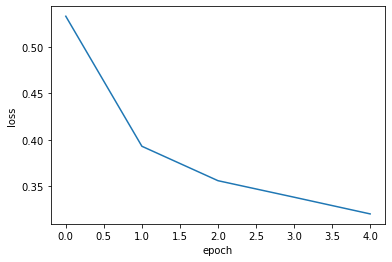

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

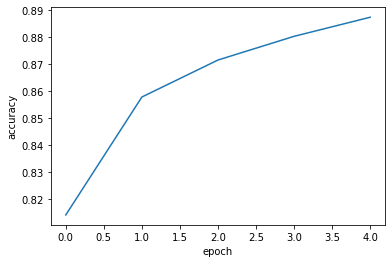

In [50]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

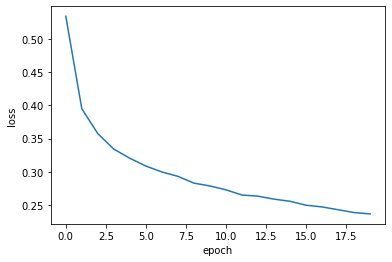

In [51]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실
- 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 나음

In [52]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


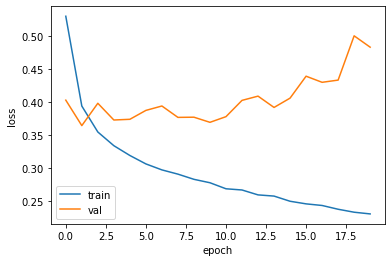

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어짐

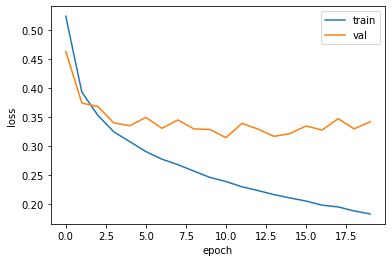

In [55]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음
- 얼마나 많은 뉴런을 드롭할지는 우리가 정해야 하는 하이퍼파라미터
- 왜 과대적합을 막는가? 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 하기 때문

In [56]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


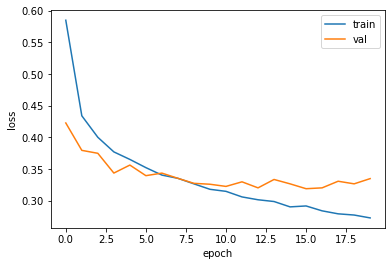

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                   validation_data=(val_scaled, val_target))

In [59]:
model.save_weights('model-weights.h5')

In [60]:
model.save('model-whole.h5')

In [61]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [62]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8753333333333333


In [63]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 457us/step - loss: 0.3413 - accuracy: 0.8753


[0.34129825234413147, 0.875333309173584]

---
## 2021-02-22
---


## 콜백
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저장

In [64]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
         validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

- 모델이 훈련한 후에 best-model.h5에 최상의 검증 점수를 낸 모델이 저장

In [65]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 444us/step - loss: 0.3278 - accuracy: 0.8854


[0.32782429456710815, 0.8854166865348816]

- ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장해 줌
- **조기 종료**: 과대적합이 시작되기 전에 훈련을 미리 중지하는 것
- 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할 수도 있음
- 케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공함
- patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
- 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌림

In [66]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data=(val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

In [67]:
print(early_stopping_cb.stopped_epoch)

9


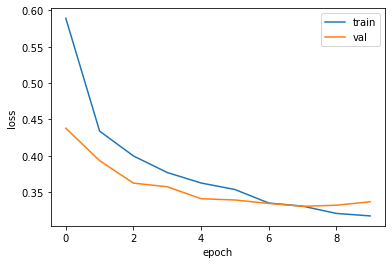

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [69]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 446us/step - loss: 0.3302 - accuracy: 0.8790


[0.33024248480796814, 0.8790000081062317]